
# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 72</p>
## <p style="text-align: center;">Due: Tuesday, February 22nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ridge and Lasso Regression (20 points)
Use the following code to import the dow_jones dataset.

In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('dow_jones_index.data')
df = df.dropna()
X = df[[u'open', u'high', u'low', u'close',
       u'volume', u'percent_change_price',
       u'percent_change_volume_over_last_wk', u'previous_weeks_volume', u'next_weeks_close',
       u'percent_change_next_weeks_price', u'days_to_next_dividend',
       u'percent_return_next_dividend']]
X = X.as_matrix()

for feat in range(X.shape[1]):
    try:
        if "$" in X[0, feat]:
            X[:,feat] = [i.split("$")[1] for i in X[:,feat]]
    except:
        pass
X = X.astype('float')
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

y = df[[u'next_weeks_open']]
y = y.as_matrix()
y = [i.split("$")[1] for i in y[:, 0]]
y = np.array(y)
y = y.astype('float')

You will reuse the same dataset that you used in HW1. In this HW, you will add additional second-order polynomial and interaction variables to the features matrix. Note that this code adds all combinations of the features with degree less than or equal to two; in practice one may introduce only a few based on domain knowledge or experimentation.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{6}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(6,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation on each model. The cross validation should happen on your training data using  average MSE as the scoring metric. (5pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? What do you observe about the coefficients returned from the ridge and lasso models? (5pts)


3) What are the top 10 most important features for the lasso and ridge models for the hyperparameters that got the best MSE? (2pts)


4) SKLearn can perform this cross validation for us and choose the best regularization hyper-parameter. It will automatically determine the range of $\lambda$ s to search over. Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

    Report the best $\lambda$ based on cross validation. (3 pts)
    
5) 
    i) Run Ridge, lasso with the best hyperparameters and report the MSE on test data. 
    ii) Run OLS on the training data with all the features and then with the features selected through lasso (features with non zero weights). Report the MSE on test data. (5 pts)

## Answer


In [7]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import Ridge, Lasso

import numpy as np
import matplotlib.pyplot as plt

n_folds = 5
k_fold = KFold(len(X_train), n_folds)
alphas =  10**np.linspace(6,-2,100)*0.5
lasso_avg_rmse = {}
ridge_avg_rmse = {}

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=1000)
    avg_mse = 0
    for k, (train, test) in enumerate(k_fold):
        lasso.fit(X_train[train], y_train[train])
        avg_mse = avg_mse + mean_squared_error(y_train[test], lasso.predict(X_train[test])) 
    lasso_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_lasso = min(lasso_avg_rmse, key=lasso_avg_rmse.get)
print("Best lasso λ: {0}, Best MSE: {1}".format(best_alpha_lasso, min(lasso_avg_rmse)))

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=1000)
    avg_mse = 0
    for k, (train, test) in enumerate(k_fold):
        ridge.fit(X_train[train], y_train[train])
        avg_mse = avg_mse + mean_squared_error(y_train[test], ridge.predict(X_train[test])) 
    ridge_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_ridge = min(ridge_avg_rmse, key=ridge_avg_rmse.get)
print("Best ridge λ: {0}, Best MSE: {1}".format(best_alpha_ridge, min(ridge_avg_rmse)))

Best lasso λ: 0.008737642000038414, Best MSE: 0.005
Best ridge λ: 0.005, Best MSE: 0.005


As we can see above, the optimal alpha for Lasso is 0.005; and the optimal alpha for Ridge is 0.005.

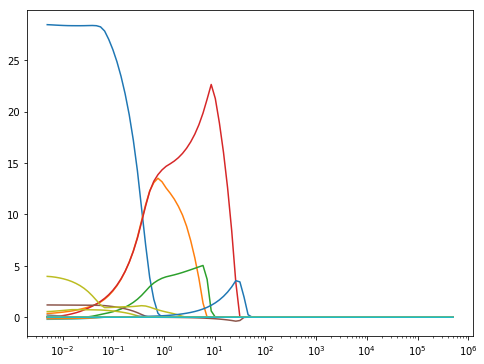

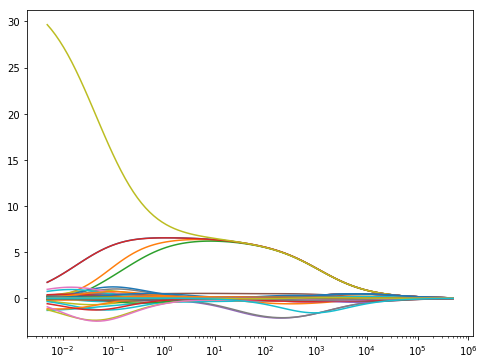

In [23]:
#2)
cof_lasso, cof_ridge = [], []

for a in alphas:
    regression_lasson = Lasso(alpha = a)
    regression_lasson.fit(X_train, y_train)
    cof_lasso.append(regression_lasson.coef_)
    
    regression_ridge = Ridge(alpha = a)
    regression_ridge.fit(X_train, y_train)
    cof_ridge.append(regression_ridge.coef_)
# semi-column surpress the unwanted output
# https://stackoverflow.com/questions/25790062/how-to-hide-matplotlib-lines-line2d-in-ipython-notebook
plt.figure().set_size_inches(8, 6);
plt.semilogx(alphas, cof_lasso);
plt.figure().set_size_inches(8, 6);
plt.semilogx(alphas, cof_ridge);

For both the Lasso and Ridge methods, the coefficients will become 0 when lambda is large enough. For the Lasso method, the coefficient becomes 0 earlier than the Ridge and can generate different models when $\lambda$ is diffrent. But for the Ridge method, the change is more smooth and all the coefficients will become 0 when $\lambda$ reaches a same value.

In [112]:
#3)

# 
df = pd.read_csv('dow_jones_index.data')
df = df.dropna()
X = df[[u'open', u'high', u'low', u'close',
       u'volume', u'percent_change_price',
       u'percent_change_volume_over_last_wk', u'previous_weeks_volume', u'next_weeks_close',
       u'percent_change_next_weeks_price', u'days_to_next_dividend',
       u'percent_return_next_dividend']]
X = X.as_matrix()


names = [u'open', u'high', u'low', u'close',
       u'volume', u'percent_change_price',
       u'percent_change_volume_over_last_wk', u'previous_weeks_volume', u'next_weeks_close',
       u'percent_change_next_weeks_price', u'days_to_next_dividend',
       u'percent_return_next_dividend']

for feat in range(X.shape[1]):
    try:
        if "$" in X[0, feat]:
            X[:,feat] = [i.split("$")[1] for i in X[:,feat]]
    except:
        pass
X = X.astype('float')
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

y = df[[u'next_weeks_open']]
y = y.as_matrix()
y = [i.split("$")[1] for i in y[:, 0]]
y = np.array(y)
y = y.astype('float')

from sklearn.preprocessing import PolynomialFeatures
feature_names_lasso = PolynomialFeatures(2, include_bias=False).fit(X).get_feature_names(names)
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

lasso = Lasso(alpha = 0.008)
lasso.fit(X_train, y_train)
# https://stackoverflow.com/questions/6910641/how-to-get-indices-of-n-maximum-values-in-a-numpy-array
max_index = lasso.coef_.argsort()[-10:][::-1]

print(" -------------- Lasso -----------")
for i in max_index:
    print('index: ', i, '   feature name: ', feature_names_lasso[i], '    weight:  ',lasso.coef_[i])
#     print('index {0},   {1:.30},   {2:.10}'.format(i, feature_names_lasso[i], lasso.coef_[i]))
    
# ####################

print('#' * 60)

df = pd.read_csv('dow_jones_index.data')
df = df.dropna()
X = df[[u'open', u'high', u'low', u'close',
       u'volume', u'percent_change_price',
       u'percent_change_volume_over_last_wk', u'previous_weeks_volume', u'next_weeks_close',
       u'percent_change_next_weeks_price', u'days_to_next_dividend',
       u'percent_return_next_dividend']]
X = X.as_matrix()

for feat in range(X.shape[1]):
    try:
        if "$" in X[0, feat]:
            X[:,feat] = [i.split("$")[1] for i in X[:,feat]]
    except:
        pass
X = X.astype('float')
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

y = df[[u'next_weeks_open']]
y = y.as_matrix()
y = [i.split("$")[1] for i in y[:, 0]]
y = np.array(y)
y = y.astype('float')

from sklearn.preprocessing import PolynomialFeatures
feature_names_ridge = PolynomialFeatures(2, include_bias=False).fit(X).get_feature_names(names)
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)
    
ridge = Ridge(alpha= 0.005)
ridge.fit(X_train, y_train)
max_index = ridge.coef_.argsort()[-10:][::-1]
print(" -------------- Ridge -----------")
for i in max_index:
    print('index: ', i, 'feature name: ', feature_names_ridge[i], 'weight:  ', ridge.coef_[i])

 -------------- Lasso -----------
index:  0    feature name:  open     weight:   28.4012191303
index:  8    feature name:  next_weeks_close     weight:   3.85441096634
index:  5    feature name:  percent_change_price     weight:   1.18539532599
index:  28    feature name:  high percent_change_price     weight:   0.611858802042
index:  1    feature name:  high     weight:   0.436928103707
index:  17    feature name:  open percent_change_price     weight:   0.136023948367
index:  3    feature name:  close     weight:   0.0823935323743
index:  6    feature name:  percent_change_volume_over_last_wk     weight:   0.0230343353713
index:  11    feature name:  percent_return_next_dividend     weight:   0.00981566193473
index:  63    feature name:  percent_change_price percent_change_volume_over_last_wk     weight:   0.00237593840013
############################################################
 -------------- Ridge -----------
index:  8 feature name:  next_weeks_close weight:   29.6440509209
in

In [115]:
# 4)
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
regression_lasso = lasso_cv.fit(X_train, y_train)
lambda_optimal = regression_lasso.alpha_
coef = regression_lasso.coef_

print("Best lambda: ", lambda_optimal)
print("Coefficient: ", coef)

Best lambda:  0.0466112165952
Coefficient:  [  0.00000000e+00   2.53525574e+00   2.16556032e+00   1.91278452e+01
  -0.00000000e+00   5.39972624e-02   0.00000000e+00  -0.00000000e+00
   9.06155486e+00  -3.72584773e-01  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   2.72372354e-02   0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -2.25561293e-01  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   7.74405274e-04  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -1.06866344e-03
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.000

In [116]:
# 5 - (1))

regression_lasso = Lasso(alpha= 0.0087)
regression_lasso.fit(X_train, y_train)
mse_lasso = np.mean((regression_lasso.predict(X_test) - y_test) ** 2)

regression_ridge = Ridge(alpha= 0.005)
regression_ridge.fit(X_train, y_train)
mse_ridge = np.mean((regression_ridge.predict(X_test) - y_test) ** 2)

print("Lasso MSE:", mse_lasso)
print("Ridge MSE:", mse_ridge)

Lasso MSE: 0.159849159821
Ridge MSE: 0.00193173303189


In [3]:
from sklearn.linear_model import LinearRegression

X_train_selected = X_train[:,lasso.coef_!=0]
X_test_selected = X_test[:,lasso.coef_!=0]

linear = LinearRegression()
linear.fit(X_train, y_train)
mse = mean_squared_error(y_test, linear.predict(X_test))
print('MSE for linear with all features: {}'.format(mse))
                         
linear.fit(X_train_selected, y_train)
mse = mean_squared_error(y_test, linear.predict(X_test_selected))
print('MSE for linear with selected features: {}'.format(mse))

MSE for linear with all features: 0.0002554088434953395
MSE for linear with selected features: 0.15441347946418985


# Question 2: Bias-Variance Tradeoff (5 points)

1. Describe the relationship between Ordinary Least Squares and Ridge Regression (the problem analyzed in the previous question) with reference to Bias-Variance trade-off.
3. Which is a higher variance model, kNN with k = 1 or with k = 10?

1.When the number of samples n is far larger than the number of dimensionality p, least square yields lower bias. However, else if n is not sufficiently larger than p, least square can also bring higher variance, which will cause overfitting and poor predictions. Also considering the case when p > n, least square method cannot be used at all since the prediction is no longer reliable.


2.kNN with k = 1 is a higher variance model, because it is only taking the nearest 1 point for clustering; on the other hand, k = 10 means that averaging over 10 nearest points, which will lead to more robust results.

# Question 3 - Principal Component Analysis (15 points)

Import the same dataset with the interaction variables as in Q1.

In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('dow_jones_index.data')
df = df.dropna()
X = df[[u'open', u'high', u'low', u'close',
       u'volume', u'percent_change_price',
       u'percent_change_volume_over_last_wk', u'previous_weeks_volume', u'next_weeks_close',
       u'percent_change_next_weeks_price', u'days_to_next_dividend',
       u'percent_return_next_dividend']]
X = X.as_matrix()

for feat in range(X.shape[1]):
    try:
        if "$" in X[0, feat]:
            X[:,feat] = [i.split("$")[1] for i in X[:,feat]]
    except:
        pass
X = X.astype('float')
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

y = df[[u'next_weeks_open']]
y = y.as_matrix()
y = [i.split("$")[1] for i in y[:, 0]]
y = np.array(y)
y = y.astype('float')

In [14]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

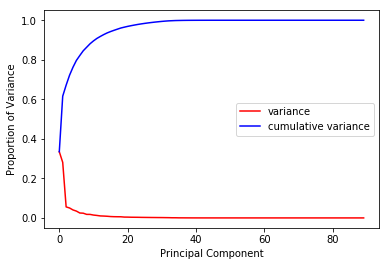

Number of principal components to explain cumulative variance of 90%: 12
Number of principal components to explain cumulative variance of 95%: 18
Number of principal components to explain cumulative variance of 99%: 29


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
variance = pca.explained_variance_ratio_
variance_plot, = plt.plot(variance, 'r', label='variance')

cumulative_variance = []
N1 = 0
N2 = 0
N3 = 0
count = 0
for item in variance:
    count = count + 1
    if len(cumulative_variance) == 0:
        cumulative_variance.append(item)
        continue
    else:
        cumulative_variance.append(item + cumulative_variance[-1])
    if cumulative_variance[-1] >= 0.9 and cumulative_variance[-2] < 0.9:
        N1 = count
    if cumulative_variance[-1] >= 0.95 and cumulative_variance[-2] < 0.95:
        N2 = count
    if cumulative_variance[-1] >= 0.99 and cumulative_variance[-2] < 0.99:
        N3 = count

cumulative_variance_plot, = plt.plot(cumulative_variance, 'b', label = 'cumulative variance')
plt.legend(handles=[variance_plot, cumulative_variance_plot])
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.show()

print("Number of principal components to explain cumulative variance of 90%: " + str(N1))
print("Number of principal components to explain cumulative variance of 95%: " + str(N2))
print("Number of principal components to explain cumulative variance of 99%: " + str(N3))

In [45]:
import statsmodels.api as sm

X_train_pca = pca.transform(X_train)

X_train_90 = sm.add_constant(X_train_pca[:,:12])
X_train_95 = sm.add_constant(X_train_pca[:,:18])
X_train_99 = sm.add_constant(X_train_pca[:,:29])
X_train_pca = sm.add_constant(X_train_pca)

model_ols = sm.OLS(y_train, X_train_pca).fit()
model_ols_90 = sm.OLS(y_train, X_train_90).fit()
model_ols_95 = sm.OLS(y_train, X_train_95).fit()
model_ols_99 = sm.OLS(y_train, X_train_99).fit()

X_test_pca = pca.transform(X_test)
X_test_90 = sm.add_constant(X_test_pca[:,:12])
X_test_95 = sm.add_constant(X_test_pca[:,:18])
X_test_99 = sm.add_constant(X_test_pca[:,:29])
X_test_pca = sm.add_constant(X_test_pca)

mse = np.mean((model_ols.predict(X_test_pca) - y_test) ** 2)
mse_90 = np.mean((model_ols_90.predict(X_test_90) - y_test) ** 2)
mse_95 = np.mean((model_ols_95.predict(X_test_95) - y_test) ** 2)
mse_99 = np.mean((model_ols_99.predict(X_test_99) - y_test) ** 2)

print("MSE of X_text using N1 features from PCA: " + str(mse_90))
print("MSE of X_text using N2 features from PCA: " + str(mse_95))
print("MSE of X_text using N3 features from PCA: " + str(mse_99))
print("MSE of X_text using all features from PCA: " + str(mse))

MSE of X_text using N1 features from PCA: 145.469202378
MSE of X_text using N2 features from PCA: 27.7258861025
MSE of X_text using N3 features from PCA: 3.19815659743
MSE of X_text using all features from PCA: 0.000255408950307


By comparison, it is easy to find that with more principal components, the MSE of test data will be smaller.  
  


(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X_train matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. How many principal components (N1, N2, N3) are required to explain cumulative variance of 90%, 95%, and 99%, respectively? (6 pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. Fit PCA on X_train and predict on X_test. Compare the test MSE using N1, N2, N3 to using all features from PCA (6 pts)

(d) Compare this to the MSE reported in Q1.For this dataset, would you use PCA/Lasso as a feature elimination technique based on: (3 pts)
i) Interpretability of results
ii) MSE value
iii) Hyperparameter tuning?

## Answer
(a)  
Answer is shown above.  
(b)  
Answer is shown above.  
(c)  
i) Based on interpretability of results, I would use Lasso as a feature elimination technique. PCA is actually doing projection, after which features will be hard to be interpreted and with no practical meanings.  
ii) Based on MSE value, I would use PCA as a feature elimination technique, since the MSE of PCA is much smaller than that of Lasso.  
iii) Based on Hyperparameter tuning, I would use PCA as a feature elimination technique. PCA does not need to find the best parameters for training model by cross validation. However, Lasso with KFolds does.

# Question 4 - Sampling (3+2=5pts)

1 . Your firm is conducting a customer survey for a new product. You are tasked with estimating whether the product will be liked or disliked by the entire market. Unfortunately, you cannot reach all the customers. So you randomly sample 400 participants and ask them "Will you like the product" as a question. The responses are evenly split. But you attended a Data Mining course, so you know the estimate is not simply 50%. 
   
What are the lower and upper bounds of probability corresponding to a confidence of 99% ($\alpha = 0.99$)?


2 . Your manager asks you to halve the probability range you reported in part 1. This can be accomplished in two different ways:

    a) Reduce the confidence without going below 90%. 
    OR
    b) Conduct a new survey to acquire more samples. In this case let us assume that the results are again evenly split.
    
Which option is viable? If a), what is the highest confidence you can use? And if b), how many samples do you need?

## Answer

1.  
For each participant, his/her answer takes a Bernoulli Distribution. Its mean is $\hat{p}$, where $\hat{p}$ is $0.5$ here. Its variance is $\sigma^{2} = \frac{\hat{p}(1-\hat{p})}{m}$, where m is sample number, which is 400 here. And thus, $\sigma = \frac{1}{40}$.  
When $\alpha = 0.99$, the upper bound of probability should be:  
$$
\begin{align}
& 0.5 + 2.58\sigma \\
= \ & 0.5 + 0.0645 \\
= \ & 0.5645
\end{align}
$$
Similarly, the lower bound of probability should be:  
$$
\begin{align}
& 0.5 - 2.58\sigma \\
= \ & 0.5 - 0.0645 \\
= \ & 0.4355
\end{align}
\\
$$
  
2.  
Option b) is viable, since option a) actually does nothing and won't improve the accuracy of our estimation. For option b), the required sample number to halve the probability range should be:  
$$
\begin{align}
& 0.5 \times (1-0.5) \times (\frac{2.58}{\frac{0.0645}{2}})^2 \\
= \ & 1600
\end{align}
$$

# Question 5: Ridge and Lasso Regression (15 points)
The ridge regression problem is characterized by the following loss function:
$$\mathcal{L}(\beta) = ||X \beta - y||_2^2 + \lambda ||\beta||^2_2$$

The ridge regression problem is the case where the penalty term ($\lambda ||\beta||$) uses the squared l-2 norm ($\lambda ||\beta||^2$).

a) Find the closed form solution to the ridge regresion problem
$$\underset{\beta}{\mathrm{argmin}} \mathcal{L}(\beta)$$
where $\mathcal{L}(\beta)$ is the loss function above.

b) Now given the SVD of $X$ as $U \Sigma V^T$, express $X \hat \beta_{ridge}$ in terms of $U$, $V$ and $\Sigma$

c) Explain what the expression for $X \hat \beta_{ridge}$ derived above tells us about how the addition of the regularization term affects the solution. (Hint: think about $\lambda ||\beta||^2$ as a penalty term)

# Answer
a)  
The closed form solution to the ridge regression problem above is:  
$$
\begin{align}
\underset{\beta}{\mathrm{argmin}} \mathcal{L}(\beta) & \ =  \ \hat \beta_{ridge}\\
& \ = \ (\lambda I + X^T X)^{-1}X^T y
\end{align}
\\
$$
b)  
Given the SVD of $X$ as $U \Sigma V^T$,  $X \hat \beta_{ridge}$ can be expressed as below:  
$$
\begin{align}
X \hat \beta_{ridge} & \ = \ U \Sigma V^T (\lambda I + V \Sigma^T U^T U \Sigma V^T)^{-1} V \Sigma^T U^T y \\
& \ = \ U \Sigma V^T (\lambda I + V \Sigma^2 V^T)^{-1} V \Sigma^T U^T y \\
& \ = \ U \Sigma V^T ([V (\lambda I + \Sigma^2) V^T])^{-1} V \Sigma^T U^T y \\
& \ = \ U \Sigma V^T V (\lambda I + \Sigma^2)^{-1} V^{-1} V \Sigma^T U^T y \\
& \ = \ U \Sigma (\lambda I + \Sigma^2)^{-1} \Sigma^T U^T y \\
& \ = \ U \Sigma (\lambda I + \Sigma^2)^{-1} (U \Sigma)^T y \\
\end{align}
\\
$$
c)  
According to the expression above, $\hat{y} \ =  \sum_{j=1}^{p} u_j \frac{\sigma^2_j}{\sigma^2_j + \lambda} u_j^T y$, where $u_j$ is the $j^{th}$ normalized principal components of $X$, $\sigma_{j}$ is the $j^{th}$ singular value of $X$. The shrinkage factor given by ridge regression here is:  
$$
\frac{\sigma^2_j}{\sigma^2_j + \lambda}
$$
Since for any $\lambda > 0$, the value of expression above will be smaller than that when $\lambda = 0$, the addition of the regularization term $\lambda$ will actually affect the solution by shrinking the singular values. So, when $\lambda$ grows, the regression curve will be compressed to some extent.


# Question 6 - Outliers and Huber Loss (12 pts)

In this problem, we will use the same data set from the previous problem set to fit a linear model to the data using a Huber loss function rather than the l-2 norm usually used in OLS. sklearn has a nice API you can use: [http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor)

Below is a snippet from the previous problem set to help you get started. For this problem, the only independent variable will be the "percent\_change\_price" feature.


In [46]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dow_jones_index.data')
stock = df[["percent_change_price", "next_weeks_open"]]
stock = stock.dropna()
stock = stock.as_matrix()[1:]
stock[:, 1] = [i.split("$")[1] for i in stock[:, 1]]
stock = stock.astype('float')
stock[:, 0] = (stock[:, 0] - np.mean(stock[:, 0], axis=0))/np.std(stock[:, 0], axis=0)

X = stock[:,:1]
y = stock[:, 1]
X_train = X[:400,]
y_train = y[:400]

X_test = X[400:,]
y_test = y[400:,]

clf_train = linear_model.LinearRegression()
clf_train.fit(X_train, y_train)
predictions_train = clf_train.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
print('MSE train: ', mse_train)

predictions_test = clf_train.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('MSE test: ', mse_test)

MSE train:  953.538042823
MSE test:  1192.17336874


a) Now do the same for the Huber loss function and print the test and train MSE. Use a regularization coefficient of 0. (5 pts)

In [47]:
# ANSWER

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dow_jones_index.data')
stock = df[["percent_change_price", "next_weeks_open"]]
stock = stock.dropna()
stock = stock.as_matrix()[1:]
stock[:, 1] = [i.split("$")[1] for i in stock[:, 1]]
stock = stock.astype('float')
stock[:, 0] = (stock[:, 0] - np.mean(stock[:, 0], axis=0))/np.std(stock[:, 0], axis=0)

X = stock[:,:1]
y = stock[:, 1]
X_train = X[:400,]
y_train = y[:400]

X_test = X[400:,]
y_test = y[400:,]

clf_train = linear_model.HuberRegressor()
clf_train.fit(X_train, y_train)
predictions_train = clf_train.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
print('MSE train: ', mse_train)

predictions_test = clf_train.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('MSE test: ', mse_test)

MSE train:  969.075119932
MSE test:  1235.96980953


Now let's artificially introduce some errors intro the train set:

In [ ]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 10000.0

Note that we would never actually do this in a real application, this is simply for demo purposes.

b) Now create two models as before, but using the new y vector during training (one model using OLS and another using the Huber loss). Print the test and train MSE. Use a regularization coefficient of 0. (5 pts)

In [48]:
# ANSWER

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dow_jones_index.data')
stock = df[["percent_change_price", "next_weeks_open"]]
stock = stock.dropna()
stock = stock.as_matrix()[1:]
stock[:, 1] = [i.split("$")[1] for i in stock[:, 1]]
stock = stock.astype('float')
stock[:, 0] = (stock[:, 0] - np.mean(stock[:, 0], axis=0))/np.std(stock[:, 0], axis=0)

X = stock[:,:1]
y = stock[:, 1]
X_train = X[:400,]
y_train = y[:400]

X_test = X[400:,]
y_test = y[400:,]

y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 10000.0

clf_train = linear_model.LinearRegression()
clf_train.fit(X_train, y_train_outliers)
predictions_train = clf_train.predict(X_train)
mse_train = mean_squared_error(y_train_outliers, predictions_train)
print('(OLS) MSE train: ', mse_train)

predictions_test = clf_train.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('(OLS) MSE test: ', mse_test)

clf_train_huber = linear_model.HuberRegressor()
clf_train_huber.fit(X_train, y_train_outliers)
predictions_train = clf_train_huber.predict(X_train)
mse_train = mean_squared_error(y_train_outliers, predictions_train)
print('(Huber loss) MSE train: ', mse_train)

predictions_test = clf_train_huber.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('(Huber loss) MSE test: ', mse_test)

(OLS) MSE train:  246073.324779
(OLS) MSE test:  3570.05063993
(Huber loss) MSE train:  248826.748391
(Huber loss) MSE test:  1232.54690548


c) Explain the difference in prediction performance of the two models in these two scenarios (one without significant outliers in the data, and the other with a single outlier). (2 pts)

Answer:  
Both the MSE of training datasets of the two models are high. However, when using Huber loss, the MSE of test dataset is much less than that when using OLS. And it alomost keeps the same with the one when there is no significant outliers. The reason is that, Huber loss helps build robust regression. It adopts linear penalty for large residuals, and thus, when there is a significant outlier, its effects on the coefficients of prediction model will be much less than OLS's. In this way, the model can still be accurate. 